In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14

In [2]:
SAMPLE_SIZE = int(1e7)
pp.InterpolationSettings.tables_path = "/tmp" # save interpolation tables to folder

The decay module can calculate the energy when a particle with finite lifetime will decay.

*When executed for the first time, the following cell will take some time since interpolation tables are built*

In [3]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.StandardRock(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(500, 1, False)
}

cross = pp.crosssection.make_std_crosssection(**args)
decay = pp.make_decay(cross, args["particle_def"], True)

Let's take muons with an initial energy of $10^{14} \mathrm{MeV}$ and sample the energy when the muons will decay

In [4]:
decay_energy = decay.energy_decay([1e14]*SAMPLE_SIZE, np.random.rand(SAMPLE_SIZE), [args["target"].mass_density]*SAMPLE_SIZE)

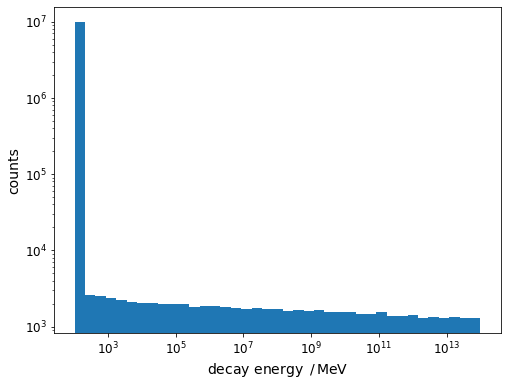

In [5]:
plt.hist(decay_energy, bins=np.geomspace(args["particle_def"].mass, 1e14, 40))
plt.xlabel(r'decay energy $\,/\, \mathrm{MeV} $')
plt.ylabel("counts")
plt.yscale("log")
plt.xscale("log")